In [144]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

import matplotlib as mpl
label_size = 8
mpl.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

In [21]:
eda = pd.read_csv("explore.csv")

In [ ]:
eda.drop(columns = "Unnamed: 0", inplace = True)

In [151]:
eda.shape

(11341042, 15)

In [155]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 15 columns):
event_id           object
session            object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
dtypes: float64(4), int64(3), object(8)
memory usage: 1.3+ GB


In [152]:
eda.head()

,event_id,session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN


In [156]:
eda.num_correct.value_counts(dropna = False)

NaN    10475595
1.0      610368
0.0      255079
Name: num_correct, dtype: int64

In [182]:
a = train_label.groupby(["installation_id", "accuracy_group"]).title.value_counts().unstack()
a.head(20)

title                           Bird Measurer (Assessment)  \
installation_id accuracy_group                               
0006a69f        0                                      1.0   
                2                                      NaN   
                3                                      1.0   
0006c192        0                                      NaN   
                2                                      1.0   
                3                                      NaN   
00129856        3                                      1.0   
001d0ed0        0                                      1.0   
                2                                      NaN   
                3                                      NaN   
00225f67        0                                      1.0   
00279ac5        0                                      NaN   
002db7e3        0                                      NaN   
                1                                      2.0   
                2                                      1.0   
                3                                      NaN   
003372b0        0                                      NaN   
                2                                      1.0   
                3                                      NaN   
004c2091        0                                      2.0   

title                           Cart Balancer (Assessment)  \
installation_id accuracy_group                               
0006a69f        0                                      NaN   
                2                                      NaN   
                3                                      NaN   
0006c192        0                                      NaN   
                2                                      NaN   
                3                                      NaN   
00129856        3                                      NaN   
001d0ed0        0                                      NaN   
                2                                      NaN   
                3                                      1.0   
00225f67        0                                      NaN   
00279ac5        0                                      NaN   
002db7e3        0                                      NaN   
                1                                      NaN   
                2                                      NaN   
                3                                      1.0   
003372b0        0                                      NaN   
                2                                      NaN   
                3                                      2.0   
004c2091        0                                      NaN   

title                           Cauldron Filler (Assessment)  \
installation_id accuracy_group                                 
0006a69f        0                                        NaN   
                2                                        NaN   
                3                                        NaN   
0006c192        0                                        NaN   
                2                                        NaN   
                3                                        1.0   
00129856        3                                        NaN   
001d0ed0        0                                        NaN   
                2                                        NaN   
                3                                        NaN   
00225f67        0                                        NaN   
00279ac5        0                                        NaN   
002db7e3        0                                        NaN   
                1                                        NaN   
                2                                        NaN   
                3                                        1.0   
003372b0        0                                        NaN   
                2                                     

# Into total dataset

In [ ]:
# this part
# try to look beyond the kids who already did assessments
# look at all game activities

Text(0.5, 1.0, 'What are the usage distributions for each world?')

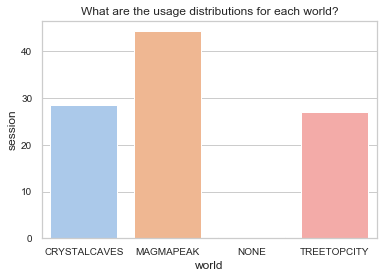

In [200]:
c = (eda.groupby("world")["session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "world" , y="session", data=pcts, palette="pastel"))
plt.title("What are the usage distributions for each world?")

Text(0.5, 1.0, 'What are the usage distributions for each item in the game?')

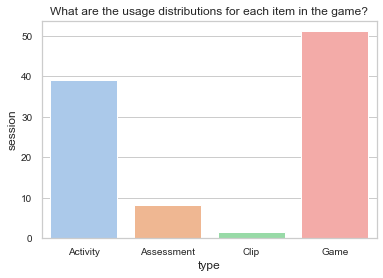

In [203]:
c = (eda.groupby("type")["session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "type" , y="session", data=pcts, palette="pastel"))

plt.title("What are the usage distributions for each item in the game?")
# overall, games and activities are much more used than assessments

In [217]:
pcts

,world,type,session
0,CRYSTALCAVES,Activity,6.097888
1,CRYSTALCAVES,Assessment,3.118417
2,CRYSTALCAVES,Clip,0.510032
3,CRYSTALCAVES,Game,18.776740
4,MAGMAPEAK,Activity,21.229707
5,MAGMAPEAK,Assessment,1.604129
6,MAGMAPEAK,Clip,0.332527
7,MAGMAPEAK,Game,21.130157
8,NONE,Clip,0.207900
9,TREETOPCITY,Activity,11.793396


In [224]:
eda.groupby(["world","type"]).title.nunique()

world         type      
CRYSTALCAVES  Activity      2
              Assessment    2
              Clip          7
              Game          4
MAGMAPEAK     Activity      3
              Assessment    1
              Clip          3
              Game          4
NONE          Clip          1
TREETOPCITY   Activity      3
              Assessment    2
              Clip          9
              Game          3
Name: title, dtype: int64

Text(0.5, 1.0, 'What are the usage distributions for each item in the game?')

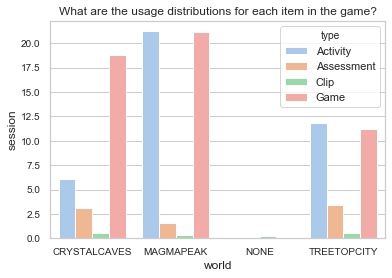

In [226]:
c = (eda.groupby(["world", "type"])["session"].count())
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(c.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "world" , y="session", data=pcts,  hue = "type",palette="pastel"))
plt.title("What are the usage distributions for each item in the game?")

In [192]:
# out of 3 worlds (MAGMAPEAK, TREETOPCITY, CRYSTALCAVES)
# each contain 4 types ('Clip', 'Activity', 'Game', 'Assessment')
# and each type may or may not contain different missions

# let's look at them
eda.groupby(["world", "type"])["title"].nunique().to_frame()

title
world        type             
CRYSTALCAVES Activity        2
             Assessment      2
             Clip            7
             Game            4
MAGMAPEAK    Activity        3
             Assessment      1
             Clip            3
             Game            4
NONE         Clip            1
TREETOPCITY  Activity        3
             Assessment      2
             Clip            9
             Game            3

In [191]:
# usage distribution of each mission
eda[eda.title ==]eda.groupby((["world", "type"]))

title
world        type             
CRYSTALCAVES Activity        2
             Assessment      2
             Clip            7
             Game            4
MAGMAPEAK    Activity        3
             Assessment      1
             Clip            3
             Game            4
NONE         Clip            1
TREETOPCITY  Activity        3
             Assessment      2
             Clip            9
             Game            3

In [185]:
eda.groupby(["world", "type"])["title"].nunique().to_frame()

session
world        type     title                       session                   
CRYSTALCAVES Activity Chicken Balancer (Activity) 7f27efcf7b2b7798  0.004678
                                                  b79581c26f3c60a3  0.002900
                                                  aadeb2f928141038  0.002523
                                                  4d9f869c2b5fe01f  0.002430
                                                  407f25d7e380edbb  0.002302
...                                                                      ...
TREETOPCITY  Game     Crystals Rule               fb51cf79fb67d8be  0.000002
                                                  fc53977531bb7a42  0.000002
                                                  fd046b87fc7da28a  0.000002
                                                  fd33ba7657e097e8  0.000002
                                                  ff051332f77a212c  0.000002

[303319 rows x 1 columns]

# About the kids who took tests

In [ ]:
# do this part so i can look at the pattern on 
# info underlying different learning routes (linear or random) 

## Assessment outcome distribution

Text(0.5, 1.0, 'What is the overall distribution for assessment outcomes?')

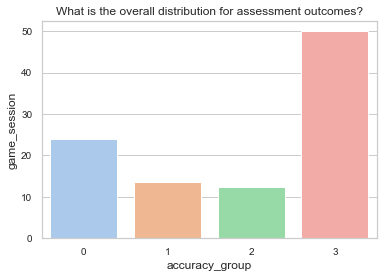

In [81]:
# Regardless of world or how many activities, video clips, or games did the kids use
# 50% of kids achieved in the first attempt itself.

ag = (train_label.groupby(['accuracy_group'])["game_session"].count())
ag_pcts = ag.groupby(level=0).apply(lambda x: 100 * x / float(ag.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x = "accuracy_group" , y="game_session", data=ag_pcts, palette="pastel"))
plt.title("What is the overall distribution for assessment outcomes?")

In [ ]:
# How will it look like if we take world into consideration 
# (aka, if there's or there're any particular world more difficult to takle?)

In [160]:
eda.columns

Index(['event_id', 'session', 'timestamp', 'event_data', 'installation_id',
       'event_count', 'event_code', 'game_time', 'title', 'type', 'world',
       'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [ ]:
# plt.title("What is the overall distribution for game, activity, video usage?")

In [97]:
train_label.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


## Distribution of different assessment items

In [158]:
list(train_label.title.unique())

['Mushroom Sorter (Assessment)',
 'Bird Measurer (Assessment)',
 'Cauldron Filler (Assessment)',
 'Chest Sorter (Assessment)',
 'Cart Balancer (Assessment)']

Text(0.5, 1.0, 'What is the overall distribution for game, activity, video usage?')

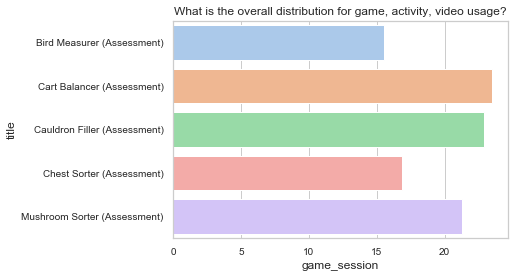

In [96]:
# some assessments appear more frequently
# next, why?
title_ag = (train_label.groupby(['title'])["game_session"].count())
title_ag_pcts = title_ag.groupby(level=0).apply(lambda x: 100 * x / float(ag.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x ="game_session", y="title", data=title_ag_pcts, palette="pastel"))
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Which assessments are associated with more attempts?")

In [ ]:
# is it because some assessments may require more effort to get  

# seems like the more frequently used assessments (Cart Balancer, Cauldron Filler, Mushroom Sorter) 
# are the ones that kids "nailed it" more frequently

# now, let's look at the if it is same group of kids (by installation_id) repeatedly taking assessments

Text(0.5, 1.0, 'What are the outcome distributions associated with each assessment')

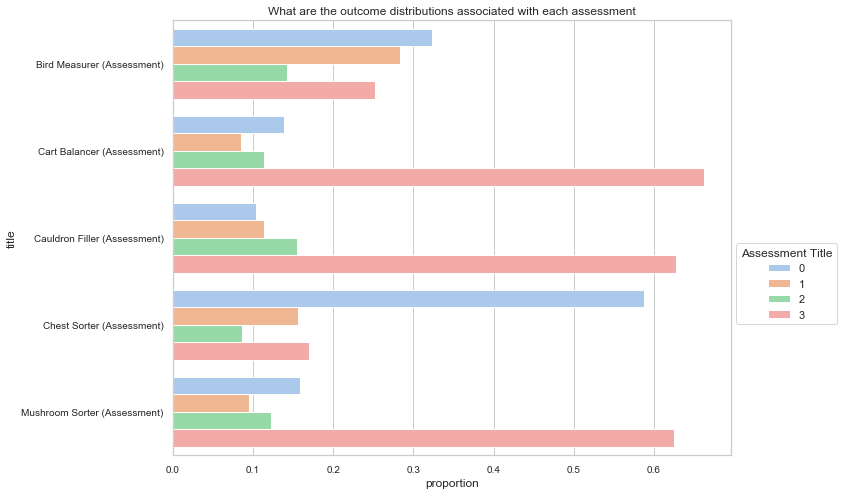

In [118]:
plt.figure(figsize=(10,8))
x, y, hue = "title", "proportion", "accuracy_group"

prop_df = (train_label
           .groupby(x)[hue]
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

(sns.barplot(x=y, y=x, hue=hue, data=prop_df, palette="pastel"))
#plt.axhline(y=.5, linestyle = '--', color = 'dimgray')
plt.legend(title='Assessment Title', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("What are the outcome distributions associated with each assessment")

In [ ]:
plt.figure(figsize=(10,8))
x, y, hue = "title", "proportion", "accuracy_group", "installation_id"

prop_df = (train_label
           .groupby(x, y)[hue]
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

(sns.barplot(x=y, y=x, hue=hue, data=prop_df, palette="pastel"))
#plt.axhline(y=.5, linestyle = '--', color = 'dimgray')
plt.legend(title='Assessment Title', loc='upper left', bbox_to_anchor=(1, 0.5))
plt.title("What are the outcome distributions associated with each assessment")

In [126]:
train_label.installation_id.nunique()

3614

In [127]:
# within the whole population, some assessments are just less taken
train_label.groupby("title").installation_id.count()

title
Bird Measurer (Assessment)      2746
Cart Balancer (Assessment)      4151
Cauldron Filler (Assessment)    4055
Chest Sorter (Assessment)       2981
Mushroom Sorter (Assessment)    3757
Name: installation_id, dtype: int64

In [ ]:
title_user = train_label.groupby("title").installation_id.count()


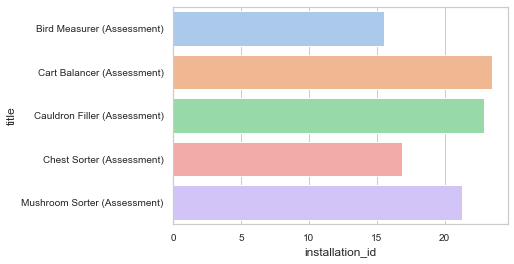

In [131]:
title_user = train_label.groupby("title").installation_id.count()
title_user_pcts = title_user.groupby(level=0).apply(lambda x: 100 * x / float(ag.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x ="installation_id" , y="title", data=title_user_pcts, palette="pastel"))
plt.title("What is the overall distribution for assessment outcomes?")

Text(0.5, 1.0, "Which of the 'nailed it at first attempt' assessments demonstrated highest user participation rate?")

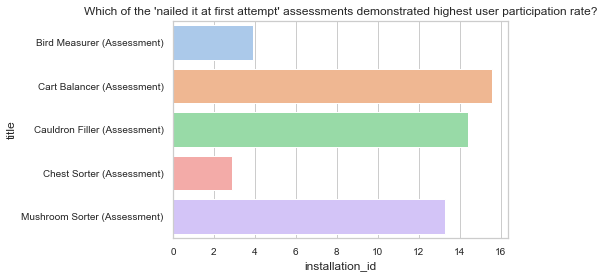

In [141]:
c = train_label[train_label.accuracy_group == 3].groupby("title").installation_id.count()
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(ag.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x ="installation_id" , y="title", data=pcts, palette="pastel"))
plt.title("Which of the 'nailed it at first attempt' assessments demonstrated highest user participation rate?")

Text(0.5, 1.0, "Which of the 'never succeed' assessments demonstrated highest user participation rate?")

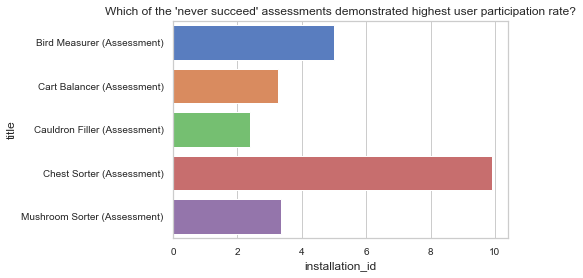

In [143]:
c = train_label[train_label.accuracy_group == 0].groupby("title").installation_id.count()
pcts = c.groupby(level=0).apply(lambda x: 100 * x / float(ag.sum())).to_frame().reset_index()
#plt.legend(title='Color', loc='center left', bbox_to_anchor=(1, 0.5))
(sns.barplot(x ="installation_id" , y="title", data=pcts, palette="muted"))
plt.title("Which of the 'never succeed' assessments demonstrated highest user participation rate?")

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(11341042, 11)

In [4]:
train_label = pd.read_csv("train_labels.csv")

In [5]:
train.head(1)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE


In [6]:
# explore total users
train.installation_id.nunique()

17000

In [7]:
# game content counts
print(f"""
Total number of 'Worlds': {train.world.nunique()}
Total number of 'Types': {train.type.nunique()}
Total number of 'Titles' {train.title.nunique()}""")


Total number of 'Worlds': 4
Total number of 'Types': 4
Total number of 'Titles' 44


In [107]:
# game content 
print(f"""
Total number of 'Worlds': {train.world.unique()}
Total number of 'Types': {train.type.unique()}
Total number of 'Titles' {train.title.unique()}""")


Total number of 'Worlds': ['NONE' 'MAGMAPEAK' 'TREETOPCITY' 'CRYSTALCAVES']
Total number of 'Types': ['Clip' 'Activity' 'Game' 'Assessment']
Total number of 'Titles' ['Welcome to Lost Lagoon!' 'Magma Peak - Level 1'
 'Sandcastle Builder (Activity)' 'Scrub-A-Dub' 'Magma Peak - Level 2'
 'Dino Drink' 'Tree Top City - Level 1' 'Ordering Spheres'
 'Watering Hole (Activity)' 'Slop Problem' 'All Star Sorting'
 'Costume Box' 'Fireworks (Activity)' '12 Monkeys'
 'Tree Top City - Level 2' 'Flower Waterer (Activity)' "Pirate's Tale"
 'Mushroom Sorter (Assessment)' 'Air Show' 'Treasure Map'
 'Tree Top City - Level 3' 'Crystals Rule' 'Rulers'
 'Bug Measurer (Activity)' 'Bird Measurer (Assessment)' 'Bubble Bath'
 'Bottle Filler (Activity)' 'Dino Dive' 'Crystal Caves - Level 1'
 'Chow Time' 'Cauldron Filler (Assessment)' 'Balancing Act'
 'Crystal Caves - Level 2' 'Crystal Caves - Level 3'
 'Chicken Balancer (Activity)' 'Lifting Heavy Things' 'Pan Balance'
 'Happy Camel' 'Honey Cake' 'Cart Balancer 

In [25]:
train.groupby(["world", "type"]).title.value_counts().to_frame()

title
world        type       title                                 
CRYSTALCAVES Activity   Chicken Balancer (Activity)     443156
                        Egg Dropper (Activity)          248408
             Assessment Chest Sorter (Assessment)       190318
                        Cart Balancer (Assessment)      163343
             Clip       Crystal Caves - Level 2          14342
                        Crystal Caves - Level 1          12505
                        Crystal Caves - Level 3          12482
                        Lifting Heavy Things              5759
                        Balancing Act                     5522
                        Honey Cake                        3882
                        Heavy, Heavier, Heaviest          3351
             Game       Chow Time                      1150974
                        Pan Balance                     384857
                        Happy Camel                     311543
                        Leaf Leader                     282104
MAGMAPEAK    Activity   Sandcastle Builder (Activity)  1034332
                        Bottle Filler (Activity)       1004068
                        Watering Hole (Activity)        369270
             Assessment Cauldron Filler (Assessment)    181925
             Clip       Magma Peak - Level 2             17115
                        Magma Peak - Level 1             13623
                        Slop Problem                      6974
             Game       Scrub-A-Dub                    1016837
                        Dino Drink                      492916
                        Bubble Bath                     458972
                        Dino Dive                       427655
NONE         Clip       Welcome to Lost Lagoon!          23578
TREETOPCITY  Activity   Fireworks (Activity)            535030
                        Bug Measurer (Activity)         446430
                        Flower Waterer (Activity)       356034
             Assessment Mushroom Sorter (Assessment)    199595
                        Bird Measurer (Assessment)      190164
             Clip       Tree Top City - Level 2          12685
                        Tree Top City - Level 1          12333
                        Tree Top City - Level 3          10516
                        Ordering Spheres                  9758
                        Costume Box                       4538
                        Pirate's Tale                     4365
                        12 Monkeys                        4124
                        Rulers                            3372
                        Treasure Map                      2852
             Game       All Star Sorting                509344
                        Crystals Rule                   453852
                        Air Show                        306239

In [26]:
train.groupby(["world", "type"]).title.nunique().to_frame()

title
world        type             
CRYSTALCAVES Activity        2
             Assessment      2
             Clip            7
             Game            4
MAGMAPEAK    Activity        3
             Assessment      1
             Clip            3
             Game            4
NONE         Clip            1
TREETOPCITY  Activity        3
             Assessment      2
             Clip            9
             Game            3

In [28]:
train[(train.world == "CRYSTALCAVES") & (train.type == "Activity") & (train.title == "Chicken Balancer (Activity)")].event_code.unique()

array([2000, 3010, 3110, 4070, 4030, 4020, 4035, 4022, 4090, 4080])

In [29]:
train[(train.world == "CRYSTALCAVES") & (train.type == "Activity") & (train.title == "Egg Dropper (Activity)")].event_code.unique()

array([2000, 3010, 2020, 3110, 4025, 4020, 4070, 4090, 4080])

In [32]:
train.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [41]:
train.groupby("event_code").world.unique().to_frame()

,world
event_code,
2000,"[NONE, MAGMAPEAK, TREETOPCITY, CRYSTALCAVES]"
2010,"[TREETOPCITY, CRYSTALCAVES, MAGMAPEAK]"
2020,"[MAGMAPEAK, TREETOPCITY, CRYSTALCAVES]"
2025,"[TREETOPCITY, MAGMAPEAK]"
2030,"[MAGMAPEAK, TREETOPCITY, CRYSTALCAVES]"
2035,"[TREETOPCITY, MAGMAPEAK]"
2040,[MAGMAPEAK]
2050,[MAGMAPEAK]
2060,"[MAGMAPEAK, TREETOPCITY, CRYSTALCAVES]"


In [40]:
train.groupby("event_code").type.unique().to_frame()

,type
event_code,
2000,"[Clip, Activity, Game, Assessment]"
2010,"[Assessment, Game, Activity]"
2020,"[Game, Assessment, Activity]"
2025,"[Game, Assessment]"
2030,"[Game, Assessment, Activity]"
2035,"[Assessment, Game]"
2040,[Game]
2050,[Game]
2060,[Game]


In [42]:
train.groupby("event_code").title.unique().to_frame()

,title
event_code,
2000,"[Welcome to Lost Lagoon!, Magma Peak - Level 1..."
2010,"[Mushroom Sorter (Assessment), Bird Measurer (..."
2020,"[Scrub-A-Dub, Dino Drink, All Star Sorting, Mu..."
2025,"[All Star Sorting, Mushroom Sorter (Assessment..."
2030,"[Scrub-A-Dub, Dino Drink, All Star Sorting, Mu..."
2035,"[Mushroom Sorter (Assessment), Bubble Bath]"
2040,[Scrub-A-Dub]
2050,[Scrub-A-Dub]
2060,"[Dino Drink, Air Show, Dino Dive, Leaf Leader]"


In [43]:
train.groupby(["world", "type", "title"]).event_code.value_counts().to_frame()

event_code
world        type     title                       event_code            
CRYSTALCAVES Activity Chicken Balancer (Activity) 4030            151200
                                                  4020             80192
                                                  4070             73820
                                                  4035             56784
                                                  3010             31342
...                                                                  ...
TREETOPCITY  Game     Crystals Rule               2000              3145
                                                  4010              2887
                                                  4050              1989
                                                  4090               251
                                                  2010                 1

[403 rows x 1 columns]

In [44]:
train.groupby(["world", "type", "title"]).event_code.unique().to_frame()

event_code
world        type       title                                                                           
CRYSTALCAVES Activity   Chicken Balancer (Activity)    [2000, 3010, 3110, 4070, 4030, 4020, 4035, 402...
                        Egg Dropper (Activity)         [2000, 3010, 2020, 3110, 4025, 4020, 4070, 409...
             Assessment Cart Balancer (Assessment)     [2000, 2020, 3010, 4030, 4020, 3110, 4100, 302...
                        Chest Sorter (Assessment)      [2000, 2020, 3010, 3110, 4070, 4030, 4025, 404...
             Clip       Balancing Act                                                             [2000]
                        Crystal Caves - Level 1                                                   [2000]
                        Crystal Caves - Level 2                                                   [2000]
                        Crystal Caves - Level 3                                                   [2000]
                        Heavy, Heavier, Heaviest                                                  [2000]
                        Honey Cake                                                                [2000]
                        Lifting Heavy Things                                                      [2000]
             Game       Chow Time                      [2000, 4010, 3010, 3110, 2020, 4070, 4030, 403...
                        Happy Camel                    [2000, 4010, 2080, 4070, 2081, 2020, 3010, 403...
                        Leaf Leader                    [2000, 4010, 2060, 3010, 4070, 3110, 2070, 202...
                        Pan Balance                    [2000, 4010, 2020, 3010, 4070, 3110, 4030, 402...
MAGMAPEAK    Activity   Bottle Filler (Activity)       [2000, 2020, 3010, 4030, 3110, 4020, 4035, 203...
                        Sandcastle Builder (Activity)  [2000, 3010, 3110, 4070, 4090, 4030, 4035, 402...
                        Watering Hole (Activity)       [2000, 3010, 3110, 4021, 4020, 4025, 4070, 500...
             Assessment Cauldron Filler (Assessment)   [2000, 2020, 3010, 4070, 4030, 4020, 3110, 410...
             Clip       Magma Peak - Level 1                                                      [2000]
                        Magma Peak - Level 2                                                      [2000]
                        Slop Problem                                                              [2000]
             Game       Bubble Bath                    [2000, 4010, 2080, 2083, 3010, 3110, 2020, 404...
                        Dino Dive                      [2000, 4010, 3010, 4070, 3110, 2060, 3021, 312...
                        Dino Drink                     [2000, 4010, 2060, 3010, 4070, 3110, 2070, 202...
                        Scrub-A-Dub                    [2000, 4010, 2080, 2083, 2040, 2020, 3010, 407...
NONE         Clip       Welcome to Lost Lagoon!                                                   [2000]
TREETOPCITY  Activity   Bug Measurer (Activity)        [2000, 3010, 4030, 3110, 4035, 4025, 4070, 409...
                        Fireworks (Activity)            [2000, 3010, 4030, 4020, 3110, 4070, 4090, 4080]
                        Flower Waterer (Activity)      [2000, 3010, 4070, 3110, 4030, 4020, 4025, 402...
             Assessment Bird Measurer (Assessment)     [2000, 2020, 3010, 3110, 4030, 4025, 4110, 302...
                        Mushroom Sorter (Assessment)   [2000, 2025, 3010, 3110, 4025, 3021, 3121, 407...
             Clip       12 Monkeys                                                                [2000]
                        Costume Box                                                               [2000]
                        Ordering Spheres                                                          [2000]
                        Pirate's Tale                                                             [2000]
                        Rulers                                                                    [2000]

In [47]:
train[train.type == "Clip"].event_code.unique()

array([2000])

In [49]:
train[train.type == "Activity"].event_code.nunique()

17

In [50]:
train[train.type == "Game"].event_code.nunique()

38

In [51]:
train[train.type == "Assessment"].event_code.nunique()

22

In [53]:
# description from Kaggle
# Assessment attempts are captured in event_code 4100 for all assessments 
# except for Bird Measurer > 4110.

# Is it safe to say, event_code are code for each kind of action
# a game for age 3-5, 
# we can imagine a lot of actions are same
# learn from repetedly doing certain things over and over till they remembered

print(f"""
event_code types under each 'type":
Clip: {train[train.type == "Clip"].event_code.unique()}
Activity: {train[train.type == "Activity"].event_code.unique()}
Game: {train[train.type == "Game"].event_code.unique()}
Assessment: {train[train.type == "Assessment"].event_code.unique()}
      """)


event_code types under each 'type":
Clip: [2000]
Activity: [2000 3010 3110 4070 4090 4030 4035 4021 4020 4025 5000 5010 4022 2020
 2030 4080 2010]
Game: [2000 4010 2080 2083 2040 2020 3010 4070 3110 4020 2030 3021 3121 2050
 3020 3120 2060 2070 4030 4031 2081 4090 2025 4035 4110 4100 4045 4040
 2035 4095 4220 2075 4230 4235 4025 4050 4080 2010]
Assessment: [2000 2025 3010 3110 4025 3021 3121 4070 2035 2020 4030 4020 4040 4100
 2030 2010 4110 3020 3120 4035 4090 4080]
      


In [21]:
train.groupby(["world", "type"]).event_code.nunique().to_frame()

event_code
world        type                  
CRYSTALCAVES Activity            12
             Assessment          19
             Clip                 1
             Game                28
MAGMAPEAK    Activity            16
             Assessment          19
             Clip                 1
             Game                32
NONE         Clip                 1
TREETOPCITY  Activity            11
             Assessment          22
             Clip                 1
             Game                25

In [18]:
train.groupby(["world", "type", "title"]).event_code.nunique()

world         type        title                        
CRYSTALCAVES  Activity    Chicken Balancer (Activity)      10
                          Egg Dropper (Activity)            9
              Assessment  Cart Balancer (Assessment)       18
                          Chest Sorter (Assessment)        19
              Clip        Balancing Act                     1
                          Crystal Caves - Level 1           1
                          Crystal Caves - Level 2           1
                          Crystal Caves - Level 3           1
                          Heavy, Heavier, Heaviest          1
                          Honey Cake                        1
                          Lifting Heavy Things              1
              Game        Chow Time                        17
                          Happy Camel                      22
                          Leaf Leader                      18
                          Pan Balance                      19
MAGMAPEAK     

In [17]:
train.event_code.value_counts()

4070    2349642
4030    1544814
3010    1368695
3110    1345452
4020    1237789
2020     353006
4035     310875
2030     306032
2000     303319
3020     292655
3120     289230
3021     248370
3121     243732
4025     233083
4021     190783
4040      91879
4100      69640
4022      67102
4010      54698
4031      47176
2040      33743
2080      33497
4230      31535
4235      31526
2050      29691
2083      23091
5000      21998
5010      21541
4045      20166
2025      19987
4220      18777
2060      15770
4095      15587
4090      13724
4110      13608
2010      11696
2035      11196
2081       8403
2070       7654
2075       6925
4050       1989
4080        966
Name: event_code, dtype: int64

In [6]:
# identifier for each session
train.game_session

0           45bb1e1b6b50c07b
1           17eeb7f223665f53
2           0848ef14a8dc6892
3           0848ef14a8dc6892
4           0848ef14a8dc6892
                  ...       
11341037    c09b94eebfdf50a6
11341038    6ad8ab25003ef1b0
11341039    71904dca23b982c6
11341040    2267b18f069e875a
11341041    f31950f549d7c242
Name: game_session, Length: 11341042, dtype: object

In [26]:
train.event_data

0                      {"event_code": 2000, "event_count": 1}
1                      {"event_code": 2000, "event_count": 1}
2           {"version":"1.0","event_count":1,"game_time":0...
3           {"description":"Let's build a sandcastle! Firs...
4           {"description":"Let's build a sandcastle! Firs...
                                  ...                        
11341037    {"description":"Tap another dinosaur.","identi...
11341038               {"event_code": 2000, "event_count": 1}
11341039               {"event_code": 2000, "event_count": 1}
11341040               {"event_code": 2000, "event_count": 1}
11341041               {"event_code": 2000, "event_count": 1}
Name: event_data, Length: 11341042, dtype: object

In [ ]:
train.event_data[3]

In [7]:
# user id
train.installation_id

0           0001e90f
1           0001e90f
2           0001e90f
3           0001e90f
4           0001e90f
              ...   
11341037    fffc0583
11341038    fffc0583
11341039    fffc0583
11341040    fffc0583
11341041    fffc0583
Name: installation_id, Length: 11341042, dtype: object

In [23]:
# what is event?
train.event_count

0            1
1            1
2            1
3            2
4            3
            ..
11341037    66
11341038     1
11341039     1
11341040     1
11341041     1
Name: event_count, Length: 11341042, dtype: int64

In [27]:
# an event can look like this
train.event_data[3]

'{"description":"Let\'s build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!","identifier":"Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape","media_type":"audio","total_duration":6758,"event_count":2,"game_time":53,"event_code":3010}'

In [84]:
print(f"""
event codes: 

{train.event_code.unique()}

and there are {train.event_code.nunique()} event types
""")


event codes: 

[2000 3010 3110 4070 4090 4030 4035 4021 4020 4010 2080 2083 2040 2020
 2030 3021 3121 2050 3020 3120 2060 2070 4031 4025 5000 5010 2081 2025
 4022 2035 4040 4100 2010 4110 4045 4095 4220 2075 4230 4235 4080 4050]

and there are 42 event types



# Peek data: game_time

## Takeaway (game_time) 
record does not include clip watching time

In [38]:
# session time? or "game" time?
train.game_time

0                0
1                0
2                0
3               53
4             6972
             ...  
11341037    118615
11341038         0
11341039         0
11341040         0
11341041         0
Name: game_time, Length: 11341042, dtype: int64

In [47]:
train[train.type == "Clip"]["game_time"].unique()

array([0])

In [53]:
train[train.type == 'Activity']["game_time"].nunique()

584525

In [54]:
train[train.type == 'Game']["game_time"].nunique()

663287

In [55]:
train[train.type == 'Assessment']["game_time"].nunique()

137710

In [48]:
train.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

In [57]:
train.title.unique()

array(['Welcome to Lost Lagoon!', 'Magma Peak - Level 1',
       'Sandcastle Builder (Activity)', 'Scrub-A-Dub',
       'Magma Peak - Level 2', 'Dino Drink', 'Tree Top City - Level 1',
       'Ordering Spheres', 'Watering Hole (Activity)', 'Slop Problem',
       'All Star Sorting', 'Costume Box', 'Fireworks (Activity)',
       '12 Monkeys', 'Tree Top City - Level 2',
       'Flower Waterer (Activity)', "Pirate's Tale",
       'Mushroom Sorter (Assessment)', 'Air Show', 'Treasure Map',
       'Tree Top City - Level 3', 'Crystals Rule', 'Rulers',
       'Bug Measurer (Activity)', 'Bird Measurer (Assessment)',
       'Bubble Bath', 'Bottle Filler (Activity)', 'Dino Dive',
       'Crystal Caves - Level 1', 'Chow Time',
       'Cauldron Filler (Assessment)', 'Balancing Act',
       'Crystal Caves - Level 2', 'Crystal Caves - Level 3',
       'Chicken Balancer (Activity)', 'Lifting Heavy Things',
       'Pan Balance', 'Happy Camel', 'Honey Cake',
       'Cart Balancer (Assessment)', 'Heavy, 

In [58]:
# none is landing page
# 3 worlds in total
train.world.unique()

array(['NONE', 'MAGMAPEAK', 'TREETOPCITY', 'CRYSTALCAVES'], dtype=object)

In [60]:
train.groupby("world")["type"].value_counts()

world         type      
CRYSTALCAVES  Game          2129478
              Activity       691564
              Assessment     353661
              Clip            57843
MAGMAPEAK     Activity      2407670
              Game          2396380
              Assessment     181925
              Clip            37712
NONE          Clip            23578
TREETOPCITY   Activity      1337494
              Game          1269435
              Assessment     389759
              Clip            64543
Name: type, dtype: int64

In [76]:
train[train.event_code == 2000].event_id.nunique()

25

In [85]:
train[train.type == 'Clip'].event_code.unique()

array([2000])

In [89]:
train[train.type == 'Activity'].event_code.nunique()

17

In [88]:
train[train.type == 'Assessment'].event_code.nunique()

22

In [79]:
train[train.event_id == '27253bdc'].groupby(['installation_id', 'game_session','event_id','event_count', 'type','title', 'world']).mean()

event_code  \
installation_id game_session     event_id event_count type title                   world                     
0001e90f        04168b61c0650977 27253bdc 1           Clip Ordering Spheres        TREETOPCITY        2000   
                091587ed87b9637c 27253bdc 1           Clip Magma Peak - Level 2    MAGMAPEAK          2000   
                17eeb7f223665f53 27253bdc 1           Clip Magma Peak - Level 1    MAGMAPEAK          2000   
                3fce4f09769ff0b7 27253bdc 1           Clip Tree Top City - Level 1 TREETOPCITY        2000   
                45bb1e1b6b50c07b 27253bdc 1           Clip Welcome to Lost Lagoon! NONE               2000   
...                                                                                                    ...   
fffc0583        a0696d12d3d04f88 27253bdc 1           Clip Ordering Spheres        TREETOPCITY        2000   
                da9cabb5cb123df1 27253bdc 1           Clip Tree Top City - Level 3 TREETOPCITY        2000   
                e131c218f77fbeab 27253bdc 1           Clip Magma Peak - Level 2    MAGMAPEAK          2000   
                e6b760e8f9e40ebf 27253bdc 1           Clip Tree Top City - Level 2 TREETOPCITY        2000   
                f31950f549d7c242 27253bdc 1           Clip Tree Top City - Level 2 TREETOPCITY        2000   

                                                                                                game_time  
installation_id game_session     event_id event_count type title                   world                   
0001e90f        04168b61c0650977 27253bdc 1           Clip Ordering Spheres        TREETOPCITY          0  
                091587ed87b9637c 27253bdc 1           Clip Magma Peak - Level 2    MAGMAPEAK            0  
                17eeb7f223665f53 27253bdc 1           Clip Magma Peak - Level 1    MAGMAPEAK            0  
                3fce4f09769ff0b7 27253bdc 1           Clip Tree Top City - Level 1 TREETOPCITY          0  
                45bb1e1b6b50c07b 27253bdc 1           Clip Welcome to Lost Lagoon! NONE                 0  
...                                                                                                   ...  
fffc0583        a0696d12d3d04f88 27253bdc 1           Clip Ordering Spheres        TREETOPCITY          0  
                da9cabb5cb123df1 27253bdc 1           Clip Tree Top City - Level 3 TREETOPCITY          0  
                e131c218f77fbeab 27253bdc 1           Clip Magma Peak - Level 2    MAGMAPEAK            0  
                e6b760e8f9e40ebf 27253bdc 1           Clip Tree Top City - Level 2 TREETOPCITY          0  
                f31950f549d7c242 27253bdc 1           Clip Tree Top City - Level 2 TREETOPCITY          0  

[183676 rows x 2 columns]

# Map of the whole app

In [68]:
train.groupby(["world", "type"])["title"].nunique().to_frame()

title
world        type             
CRYSTALCAVES Activity        2
             Assessment      2
             Clip            7
             Game            4
MAGMAPEAK    Activity        3
             Assessment      1
             Clip            3
             Game            4
NONE         Clip            1
TREETOPCITY  Activity        3
             Assessment      2
             Clip            9
             Game            3

In [90]:
train.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [82]:
print(f"""
event codes: 

{train.event_code.unique()}

and there are {train.event_code.nunique()} many events types

while titles for different 'missions' for all combinations of world * activity types
is: {train.groupby(["world", "type"])["title"].nunique().sum()}
      
Maybe the event codes are coding for different missions choice?
""")


event codes: 

[2000 3010 3110 4070 4090 4030 4035 4021 4020 4010 2080 2083 2040 2020
 2030 3021 3121 2050 3020 3120 2060 2070 4031 4025 5000 5010 2081 2025
 4022 2035 4040 4100 2010 4110 4045 4095 4220 2075 4230 4235 4080 4050]

and there are 42 many events types

while titles for different 'missions' for all combinations of world * activity types
is: 44
      
Maybe the event codes are coding for different missions choice?



In [80]:
# event_id marks unique action within each section
train.groupby(["world", "type","title"])["event_id"].nunique().to_frame()

event_id
world        type       title                                  
CRYSTALCAVES Activity   Chicken Balancer (Activity)          10
                        Egg Dropper (Activity)                9
             Assessment Cart Balancer (Assessment)           18
                        Chest Sorter (Assessment)            19
             Clip       Balancing Act                         1
                        Crystal Caves - Level 1               1
                        Crystal Caves - Level 2               1
                        Crystal Caves - Level 3               1
                        Heavy, Heavier, Heaviest              1
                        Honey Cake                            1
                        Lifting Heavy Things                  1
             Game       Chow Time                            17
                        Happy Camel                          22
                        Leaf Leader                          18
                        Pan Balance                          19
MAGMAPEAK    Activity   Bottle Filler (Activity)             12
                        Sandcastle Builder (Activity)        11
                        Watering Hole (Activity)             11
             Assessment Cauldron Filler (Assessment)         19
             Clip       Magma Peak - Level 1                  1
                        Magma Peak - Level 2                  1
                        Slop Problem                          1
             Game       Bubble Bath                          24
                        Dino Dive                            16
                        Dino Drink                           19
                        Scrub-A-Dub                          19
NONE         Clip       Welcome to Lost Lagoon!               1
TREETOPCITY  Activity   Bug Measurer (Activity)               9
                        Fireworks (Activity)                  8
                        Flower Waterer (Activity)            10
             Assessment Bird Measurer (Assessment)           20
                        Mushroom Sorter (Assessment)         21
             Clip       12 Monkeys                            1
                        Costume Box                           1
                        Ordering Spheres                      1
                        Pirate's Tale                         1
                        Rulers                                1
                        Treasure Map                          1
                        Tree Top City - Level 1               1
                        Tree Top City - Level 2               1
                        Tree Top City - Level 3               1
             Game       Air Show                             19
                        All Star Sorting                     18
                        Crystals Rule                        15

In [94]:
train.game_session.nunique()

303319

In [101]:
len(train[(train.type == "Clip")| (train.type == "Game")])

5978969

In [95]:
len(train)

11341042

In [93]:
train.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world'],
      dtype='object')

In [81]:
# event_id marks unique action within each section
train.groupby(["world", "type","title"])["event_id"].nunique()

403

In [103]:
train.groupby(["world", "type","title"])["event_code"].nunique()

world         type        title                        
CRYSTALCAVES  Activity    Chicken Balancer (Activity)      10
                          Egg Dropper (Activity)            9
              Assessment  Cart Balancer (Assessment)       18
                          Chest Sorter (Assessment)        19
              Clip        Balancing Act                     1
                          Crystal Caves - Level 1           1
                          Crystal Caves - Level 2           1
                          Crystal Caves - Level 3           1
                          Heavy, Heavier, Heaviest          1
                          Honey Cake                        1
                          Lifting Heavy Things              1
              Game        Chow Time                        17
                          Happy Camel                      22
                          Leaf Leader                      18
                          Pan Balance                      19
MAGMAPEAK     

In [9]:
train.installation_id.nunique()

17000

In [18]:
train_label.groupby("installation_id")["accuracy_group"].value_counts()

installation_id  accuracy_group
0006a69f         3                 3
                 0                 1
                 2                 1
0006c192         0                 1
                 2                 1
                                  ..
ffc90c32         3                 5
                 1                 1
ffd2871d         3                 1
ffeb0b1b         1                 2
                 0                 1
Name: accuracy_group, Length: 7203, dtype: int64

In [19]:
train_label[train_label.installation_id == "0006c192"]

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
5,197a373a77101924,0006c192,Cauldron Filler (Assessment),1,0,1.0,3
6,957406a905d59afd,0006c192,Bird Measurer (Assessment),1,1,0.5,2
7,b2297d292892745a,0006c192,Mushroom Sorter (Assessment),0,4,0.0,0


In [20]:
train_label.groupby(["installation_id", "title"])["accuracy_group"].max()

installation_id  title                       
0006a69f         Bird Measurer (Assessment)      3
                 Mushroom Sorter (Assessment)    3
0006c192         Bird Measurer (Assessment)      2
                 Cauldron Filler (Assessment)    3
                 Mushroom Sorter (Assessment)    0
                                                ..
ffc90c32         Chest Sorter (Assessment)       3
                 Mushroom Sorter (Assessment)    3
ffd2871d         Cauldron Filler (Assessment)    3
ffeb0b1b         Cauldron Filler (Assessment)    1
                 Mushroom Sorter (Assessment)    0
Name: accuracy_group, Length: 9386, dtype: int64

In [7]:
# game_session, each session kid starts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11341042 entries, 0 to 11341041
Data columns (total 11 columns):
event_id           object
game_session       object
timestamp          object
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
dtypes: int64(3), object(8)
memory usage: 951.8+ MB


In [6]:
train_label.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [8]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17690 entries, 0 to 17689
Data columns (total 7 columns):
game_session       17690 non-null object
installation_id    17690 non-null object
title              17690 non-null object
num_correct        17690 non-null int64
num_incorrect      17690 non-null int64
accuracy           17690 non-null float64
accuracy_group     17690 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 967.5+ KB


In [9]:
train_label.title

0        Mushroom Sorter (Assessment)
1          Bird Measurer (Assessment)
2        Mushroom Sorter (Assessment)
3        Mushroom Sorter (Assessment)
4          Bird Measurer (Assessment)
                     ...             
17685      Bird Measurer (Assessment)
17686    Cauldron Filler (Assessment)
17687    Cauldron Filler (Assessment)
17688    Mushroom Sorter (Assessment)
17689    Cauldron Filler (Assessment)
Name: title, Length: 17690, dtype: object

In [10]:
spec = pd.read_csv("specs.csv")

In [11]:
spec.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [12]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 3 columns):
event_id    386 non-null object
info        386 non-null object
args        386 non-null object
dtypes: object(3)
memory usage: 9.2+ KB


In [14]:
spec.args[0]

'[{"name":"game_time","type":"int","info":"millisecond count since start of game"},{"name":"round","type":"int","info":"number of the current round when the event takes place or 0 if no round"},{"name":"level","type":"int","info":"number of the current level when the event takes place or 0 if no level"},{"name":"description","type":"string","info":"the text or description of the instruction"},{"name":"identifier","type":"string","info":"a unique identifier for this piece of instruction"},{"name":"media_type","type":"string","info":"the type of media that has just played:\\n\'audio\' || \'animation\' || \'other\'"},{"name":"duration","type":"int","info":"the duration of the media playback in milliseconds"},{"name":"event_count","type":"int","info":"session event counter"},{"name":"event_code","type":"int","info":"event class identifier"}]'

In [16]:
train.groupby("event_code")["event_id"].value_counts()

event_code  event_id
2000        27253bdc    183676
            77261ab5     11473
            7d093bf9     10196
            d2278a3b      7372
            4901243f      6341
                         ...  
4220        1340b8d7     18777
4230        ad148f58     31535
4235        85de926c     31526
5000        a6d66e51     21998
5010        71e712d8     21541
Name: event_id, Length: 384, dtype: int64

In [21]:
train.world.value_counts()

MAGMAPEAK       5023687
CRYSTALCAVES    3232546
TREETOPCITY     3061231
NONE              23578
Name: world, dtype: int64

In [23]:
train.groupby(["world"])["type"].value_counts()

world         type      
CRYSTALCAVES  Game          2129478
              Activity       691564
              Assessment     353661
              Clip            57843
MAGMAPEAK     Activity      2407670
              Game          2396380
              Assessment     181925
              Clip            37712
NONE          Clip            23578
TREETOPCITY   Activity      1337494
              Game          1269435
              Assessment     389759
              Clip            64543
Name: type, dtype: int64

In [24]:
train.groupby(["world","type"])["title"].value_counts()

world         type        title                        
CRYSTALCAVES  Activity    Chicken Balancer (Activity)       443156
                          Egg Dropper (Activity)            248408
              Assessment  Chest Sorter (Assessment)         190318
                          Cart Balancer (Assessment)        163343
              Clip        Crystal Caves - Level 2            14342
                          Crystal Caves - Level 1            12505
                          Crystal Caves - Level 3            12482
                          Lifting Heavy Things                5759
                          Balancing Act                       5522
                          Honey Cake                          3882
                          Heavy, Heavier, Heaviest            3351
              Game        Chow Time                        1150974
                          Pan Balance                       384857
                          Happy Camel                       311543
      

In [26]:
train.groupby(["world", "type", "title"])["event_id"].value_counts()

world         type      title                        event_id
CRYSTALCAVES  Activity  Chicken Balancer (Activity)  56bcd38d    151200
                                                     499edb7c     80192
                                                     4bb2f698     73820
                                                     cdd22e43     56784
                                                     ea321fb1     31342
                                                                  ...  
TREETOPCITY   Game      Crystals Rule                48349b14      3145
                                                     cc5087a3      2887
                                                     a1192f43      1989
                                                     93edfe2e       251
                                                     17ca3959         1
Name: event_id, Length: 403, dtype: int64

In [28]:
train.groupby(["world", "type", "title"])["event_code"].value_counts()

world         type      title                        event_code
CRYSTALCAVES  Activity  Chicken Balancer (Activity)  4030          151200
                                                     4020           80192
                                                     4070           73820
                                                     4035           56784
                                                     3010           31342
                                                                    ...  
TREETOPCITY   Game      Crystals Rule                2000            3145
                                                     4010            2887
                                                     4050            1989
                                                     4090             251
                                                     2010               1
Name: event_code, Length: 403, dtype: int64

In [44]:
train[(train.world == "TREETOPCITY") & (train.type == "Game") & (train.title == "Crystals Rule") & (train.event_code == 4030)].event_id.value_counts()

Series([], Name: event_id, dtype: int64)

In [40]:
train[(train.world == "TREETOPCITY") & (train.type == "Game") & (train.title == "Crystals Rule") & (train.event_code == 2010)].event_id.value_counts()

17ca3959    1
Name: event_id, dtype: int64

In [42]:
train[(train.world == "TREETOPCITY") & (train.type == "Game") & (train.title == "Crystals Rule") & (train.event_code == 4090)].event_id.unique()

array(['93edfe2e'], dtype=object)

In [43]:
train.title.nunique()

44

In [45]:
train_label.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [46]:
train_label.accuracy_group.unique()

array([3, 0, 2, 1])

In [49]:
big = pd.merge(train, train_label, how = 'inner', on = "installation_id")

In [61]:
s = pd.merge(train, train_label, how = 'left', on = "installation_id")

In [62]:
s.shape

(95428453, 17)

In [57]:
train_label.shape

(17690, 7)

In [64]:
train.installation_id.nunique()

17000

In [63]:
train[train.event_code == 4100]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2228,25fa8af4,901acc108f55a5a1,2019-08-06T05:22:32.357Z,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",0006a69f,44,4100,31011,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2308,14de4c5d,80d34a30c2998653,2019-08-06T05:24:50.323Z,"{""distance"":10,""target_distances"":[5,6,7,8,9,1...",0006a69f,76,4100,114370,Air Show,Game,TREETOPCITY
2335,14de4c5d,80d34a30c2998653,2019-08-06T05:25:11.292Z,"{""distance"":9,""target_distances"":[5,6,7],""corr...",0006a69f,103,4100,135341,Air Show,Game,TREETOPCITY
2375,14de4c5d,80d34a30c2998653,2019-08-06T05:25:37.207Z,"{""distance"":3,""target_distances"":[5,6,7],""corr...",0006a69f,143,4100,161258,Air Show,Game,TREETOPCITY
2409,14de4c5d,80d34a30c2998653,2019-08-06T05:26:01.055Z,"{""distance"":8,""target_distances"":[5,6,7],""corr...",0006a69f,177,4100,185103,Air Show,Game,TREETOPCITY
...,...,...,...,...,...,...,...,...,...,...,...
11338726,14de4c5d,26b2ccaacf21b135,2019-08-23T01:58:10.691Z,"{""distance"":9,""target_distances"":[6,7,8],""corr...",ffecb712,129,4100,200887,Air Show,Game,TREETOPCITY
11338735,14de4c5d,26b2ccaacf21b135,2019-08-23T01:58:29.249Z,"{""distance"":9,""target_distances"":[6,7,8],""corr...",ffecb712,138,4100,219447,Air Show,Game,TREETOPCITY
11338744,14de4c5d,26b2ccaacf21b135,2019-08-23T01:58:50.809Z,"{""distance"":4,""target_distances"":[6,7,8],""corr...",ffecb712,147,4100,241015,Air Show,Game,TREETOPCITY
11338753,14de4c5d,26b2ccaacf21b135,2019-08-23T01:59:14.049Z,"{""distance"":5,""target_distances"":[6,7,8],""corr...",ffecb712,156,4100,264252,Air Show,Game,TREETOPCITY


# getting the base df

In [9]:
train = pd.read_csv("train.csv")

In [13]:
train_label = pd.read_csv("train_labels.csv")

In [11]:
train.shape

(11341042, 11)

In [14]:
train_label.shape

(17690, 7)

In [15]:
df = pd.merge(train, train_label, how = 'left', on = "game_session")

In [16]:
df.shape

(11341042, 17)

In [17]:
df.drop(columns = ['installation_id_y', 'title_y'], inplace = True)

In [18]:
#df = df.drop(columns=['installation_id_y', 'title_y'])
df = df.rename(columns={'installation_id_x': 'installation_id', 'game_session': 'session', 'title_x': 'title'})

In [19]:
df.shape

(11341042, 15)

In [88]:
train.shape

(11341042, 11)

In [20]:
df.to_csv("explore.csv")

In [67]:
df.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id_x', 'event_count', 'event_code', 'game_time',
       'title_x', 'type', 'world', 'installation_id_y', 'title_y',
       'num_correct', 'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

In [68]:
big_df = df[~df.accuracy_group.isna()]

In [79]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 3 columns):
event_id    386 non-null object
info        386 non-null object
args        386 non-null object
dtypes: object(3)
memory usage: 9.2+ KB


In [74]:
big_df.drop(columns = ['installation_id_y','title_y'])

KeyError: "['installation_id_y' 'title_y'] not found in axis"

In [80]:
big_df.shape

(865447, 15)